In [3]:
from skeleton import *

loading: split1True


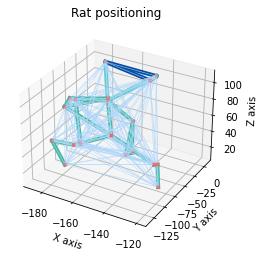

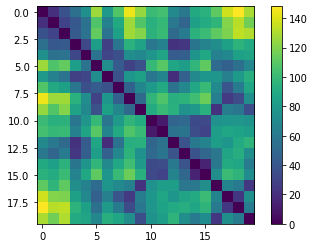

In [4]:
mat = loadMatFile('split1True')
for i in range (1):
    dist = plotKnownOrder(mat, i)  
    heatMap(dist)
    # angleHeatMap(mat, i)

loading: split1True


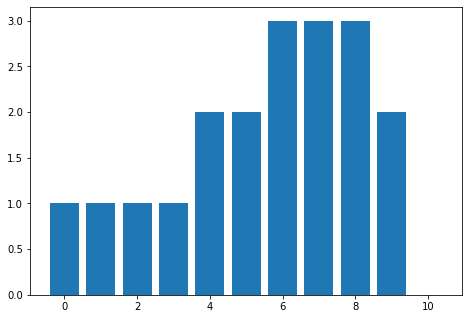

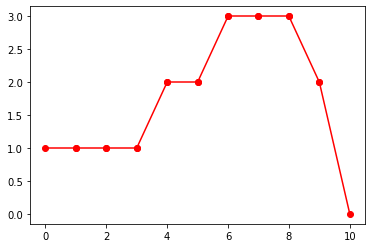

In [5]:
numb = 1
training_dist = getDistData('split1True', numb)
distBin(training_dist, numb)

In [6]:
import tensorflow as tf
numb = 500
training_dist = getDistData('split1True', numb)
testing_dist = getDistData('split2True', numb)
training_label = getLabelData(numb)
testing_label = getLabelData(numb)

loading: split1True
loading: split2True


19


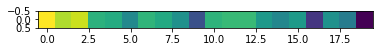

In [7]:
import matplotlib.pyplot as plt
image_index =  199
print(training_label[image_index]) # The label is 8
plt.imshow(testing_dist[image_index])

In [8]:
training_dist = training_dist.reshape(training_dist.shape[0], 1, 20, 1)
testing_dist = testing_dist.reshape(testing_dist.shape[0], 1, 20, 1)
input_shape = (1, 20, 1)

training_dist = training_dist.astype('float32')
testing_dist = testing_dist.astype('float32')


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, MaxPool2D
input_shape = (20, 1, 1)
model = Sequential()
Conv2D(64, 5, 1, padding="same", activation="relu")
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(20, activation = "softmax"))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
print(training_dist.shape)
print(training_label.shape)
model.fit(x=training_dist,y=training_label, epochs=50)

(10000, 1, 20, 1)
(10000,)
Epoch 1/50
313/313 [==============================] - 2s 4ms/step - loss: 2.3141 - accuracy: 0.3067
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 1.4661 - accuracy: 0.5180
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1.2228 - accuracy: 0.5720
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1.0814 - accuracy: 0.6261
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 1.0010 - accuracy: 0.6460
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 0.9326 - accuracy: 0.6671
Epoch 7/50
313/313 [==============================] - 2s 5ms/step - loss: 0.8840 - accuracy: 0.6882
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.8471 - accuracy: 0.7024
Epoch 9/50
313/313 [==============================] - 1s 4ms/step - loss: 0.8036 - accuracy: 0.7240
Epoch 10/50
313/313 [==============================] - 1s 5ms/step - loss

In [11]:
output = model.evaluate(testing_dist, testing_label)
print("Loss:", output[0])
print("Accuracy:", output[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0897 - accuracy: 0.9982
Loss: 0.08971326053142548
Accuracy: 0.998199999332428


predict 13
actual 13


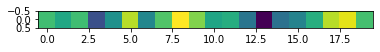

In [12]:
image_index = 233
plt.imshow(testing_dist[image_index])
pred = model.predict(testing_dist[image_index].reshape(1, 1, 20, 1))
print("predict", pred.argmax())
print("actual", testing_label[image_index])

In [13]:
def plotUnknownOrder(matFile, img_numb):
    mat = matFile[img_numb]
    x = mat[0]
    y = mat[1]
    z = mat[2]

    # loading plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # adding points, labels and lines
    try:
        ax.scatter(x,y,z, color='#ff5e5e', s =10, marker='x')
    except:
        pass
    addLabels(ax, x, y, z)
    drawLines(ax, x, y, z)
    dist = drawAllLines(ax, x, y, z)

    # Labeling plot
    ax.set_title("Rat positioning")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()
    return dist

def order(data):
    output = []
    for i in range(len(data)):
        pred = model.predict(data[i].reshape(1, 1, 20, 1))
        print(pred.argmax())
        output.append(pred.argmax())
    return np.array(output)

In [14]:
# mat = loadMatFile('split1True')
img_numb = 10

data = getDistData('split1True', img_numb)
data = data.reshape(data.shape[0], 1, 20, 1)
data = data.astype('float32')
temp = order(data)
print(temp)
# for i in range (1):
#     dist = printPlot(mat, i)  
#     heatMap(dist)

loading: split1True
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
12
4
8
12
17
8
9
10
11
12
13
14
15
19
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19  0  0  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19  0  1  2 12  4  8 12 17  8  9 10 11 12 13 14 15
 19 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16